ASSIGNMENT - 1

This program reads an image (or generates one if not found), converts it to grayscale, and applies several convolution filters such as edge detection, blur, and emboss. The filtered images are then displayed in pairs and saved to disk with appropriate error handling.

Image not found, using a random image for demonstration.


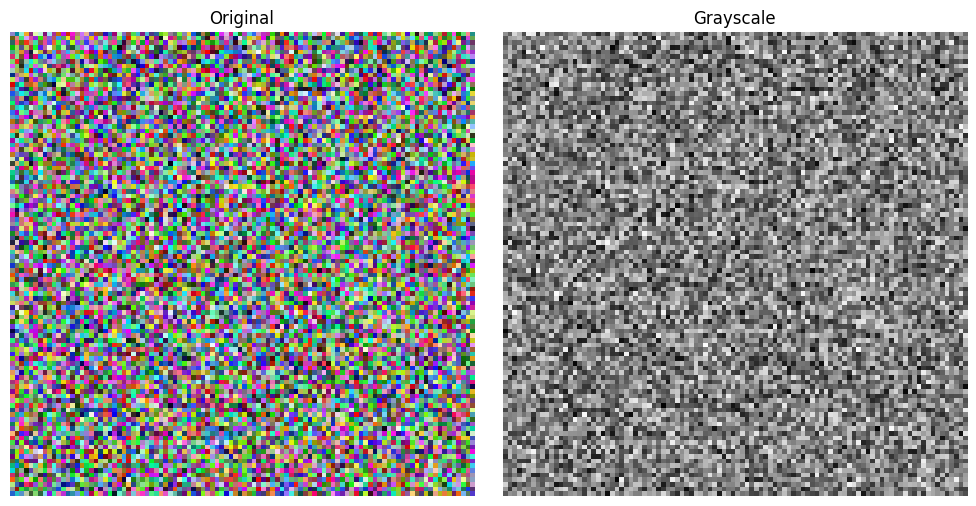

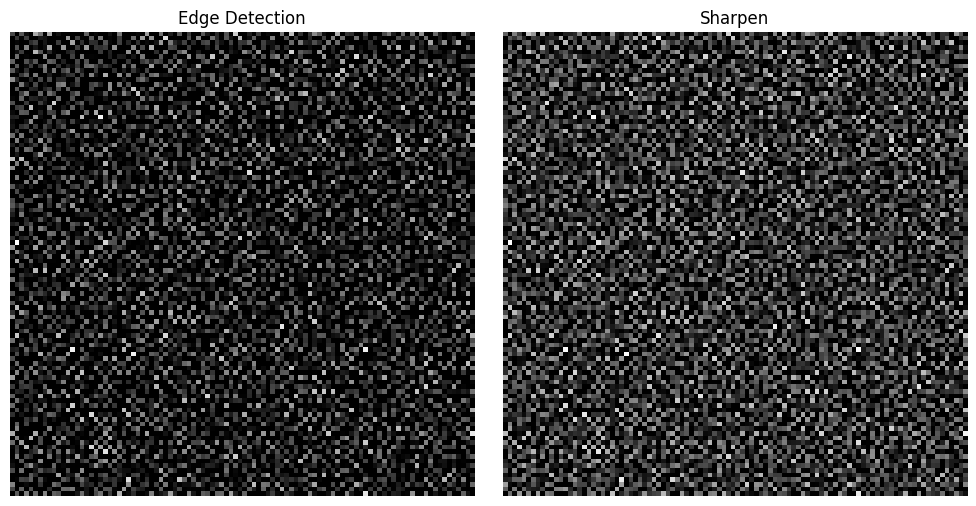

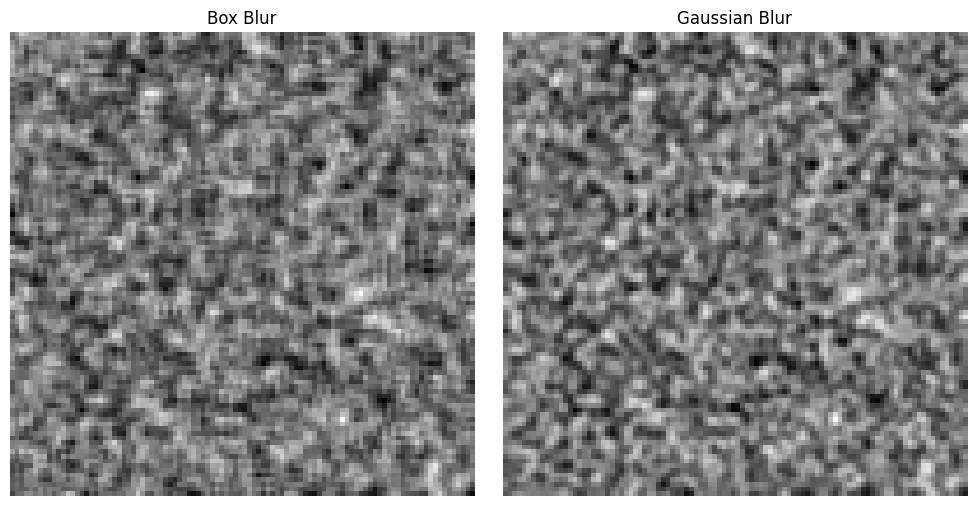

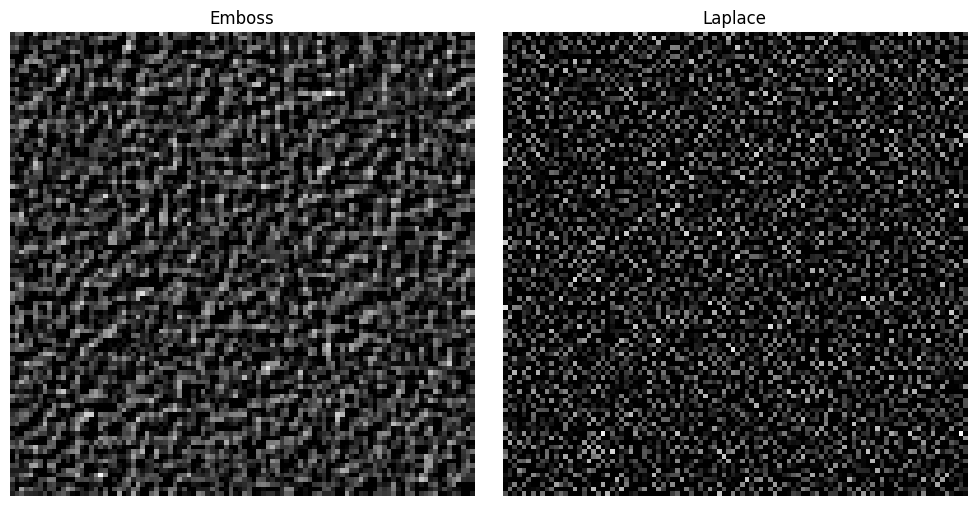

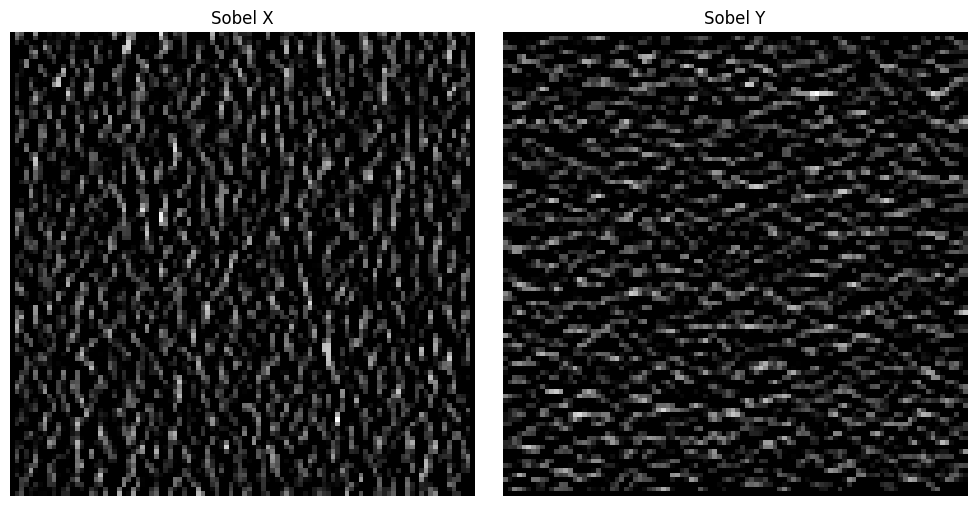

Saved filtered_images\original.jpg
Saved filtered_images\grayscale.jpg
Saved filtered_images\edge detection.jpg
Saved filtered_images\sharpen.jpg
Saved filtered_images\box blur.jpg
Saved filtered_images\gaussian blur.jpg
Saved filtered_images\emboss.jpg
Saved filtered_images\laplace.jpg
Saved filtered_images\sobel x.jpg
Saved filtered_images\sobel y.jpg


In [22]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Use a fallback if the original image is missing
IMAGE_PATH = r'C:\3rd semester\llm_nlp\image.png'  # Fixed path with raw string

if not os.path.exists(IMAGE_PATH):
    print("Image not found, using a random image for demonstration.")
    image = np.random.rand(100,100,3)
else:
    image = plt.imread(IMAGE_PATH)

def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

gray_image = rgb2gray(image)

# Define filters
filters = {
    'Original': np.array([[0,0,0],[0,1,0],[0,0,0]]), # Identity
    'Grayscale': np.array([[0,0,0],[0,1,0],[0,0,0]]), # (Handled specially)
    'Edge Detection': np.array([[0,-2,0],[-2,8,-2],[0,-2,0]]),
    'Sharpen': np.array([[0,-1,0],[-1,5,-1],[0,-1,0]]),
    'Box Blur': np.ones((3,3))/9,
    'Gaussian Blur': np.array([[1,2,1],[2,4,2],[1,2,1]])/16,
    'Emboss': np.array([[-2,-1,0],[-1,1,1],[0,1,2]]),
    'Laplace': np.array([[0,1,0],[1,-4,1],[0,1,0]]),
    'Sobel X': np.array([[-1,0,1],[-2,0,2],[-1,0,1]]),
    'Sobel Y': np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
}

def apply_filter(image, filter_kernel):
    if filter_kernel.shape[0] % 2 != 1 or filter_kernel.shape[1] % 2 != 1:
        raise ValueError("Filter kernel must have odd dimensions.")
    pad = filter_kernel.shape[0] // 2
    image_padded = np.pad(image, pad, mode='reflect')
    result = np.zeros_like(image)
    for p in range(image.shape[0]):
        for q in range(image.shape[1]):
            sum_val = 0
            for i in range(filter_kernel.shape[0]):
                for j in range(filter_kernel.shape[1]):
                    sum_val += image_padded[p+i, q+j] * filter_kernel[i,j]
            result[p,q] = sum_val
    result[result > 255] = 255
    result[result < 0] = 0
    return result

def apply_filter_to_grayscale(gray_image, filter_kernel):
    result = apply_filter(gray_image, filter_kernel)
    return result

# Prepare results for display
results = {}
results['Original'] = image
results['Grayscale'] = gray_image

for name, kernel in filters.items():
    if name in ['Original', 'Grayscale']:
        continue
    results[name] = apply_filter_to_grayscale(gray_image, kernel)

# Display two images at a time
result_items = list(results.items())
num_images = len(result_items)

for i in range(0, num_images, 2):
    fig, axes = plt.subplots(1, 2, figsize=(10,5))
    for j in range(2):
        if i+j < num_images:
            name, img = result_items[i+j]
            if name == 'Original':
                axes[j].imshow(img)
            else:
                axes[j].imshow(img, cmap='gray')
            axes[j].set_title(name)
            axes[j].axis('off')
        else:
            axes[j].axis('off')
    plt.tight_layout()
    plt.show()

# Save results with error handling
output_dir = 'filtered_images'
os.makedirs(output_dir, exist_ok=True)

for name, img in results.items():
    try:
        output_path = os.path.join(output_dir, f'{name.lower()}.jpg')
        if name == 'Original':
            plt.imsave(output_path, img)
        else:
            plt.imsave(output_path, img, cmap='gray')
        print(f"Saved {output_path}")
    except Exception as e:
        print(f"Error saving {name}: {str(e)}")

ASSIGNMENT - 2

This code demonstrates how to build a vocabulary from a text corpus, manually perform one-hot encoding for words, and clean text using a custom function that removes punctuation, numbers, and excess whitespace. It also shows a simpler one-hot encoding approach using scikit-learn's OneHotEncoder for comparison.

In [23]:
import numpy as np

# Sample text corpus
corpus = [
    "The quick brown fox jumped over the lazy dog.",
    "She sells seashells by the seashore.",
    "Peter Piper picked a peck of pickled peppers."
]

# Step 1: Build the vocabulary (unique words)
unique_words = set()
for sentence in corpus:
    for word in sentence.lower().split():
        unique_words.add(word.strip('.'))

# Step 2: Map each word to an index
word_to_index = {word: idx for idx, word in enumerate(sorted(unique_words))}

# Step 3: One-hot encode each word in each sentence
one_hot_vectors = []
for sentence in corpus:
    sentence_vectors = []
    for word in sentence.lower().split():
        word = word.strip('.')
        vector = np.zeros(len(unique_words), dtype=int)
        vector[word_to_index[word]] = 1
        sentence_vectors.append(vector)
    one_hot_vectors.append(sentence_vectors)

# Example: Print one-hot vectors for the first sentence
print("One-hot encoded vectors for the first sentence:")
print("Vocabulary size:", len(unique_words))
print("\nWord to index mapping:")
print(word_to_index)
print("\nOne-hot vectors:")
for i, vector in enumerate(one_hot_vectors[0]):
    word = corpus[0].lower().split()[i].strip('.')
    print(f"\nWord: {word}")
    print(f"Vector: {vector}")

One-hot encoded vectors for the first sentence:
Vocabulary size: 21

Word to index mapping:
{'a': 0, 'brown': 1, 'by': 2, 'dog': 3, 'fox': 4, 'jumped': 5, 'lazy': 6, 'of': 7, 'over': 8, 'peck': 9, 'peppers': 10, 'peter': 11, 'picked': 12, 'pickled': 13, 'piper': 14, 'quick': 15, 'seashells': 16, 'seashore': 17, 'sells': 18, 'she': 19, 'the': 20}

One-hot vectors:

Word: the
Vector: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]

Word: quick
Vector: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]

Word: brown
Vector: [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Word: fox
Vector: [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Word: jumped
Vector: [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Word: over
Vector: [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]

Word: the
Vector: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]

Word: lazy
Vector: [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Word: dog
Vector: [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [24]:
# With libraries (Simple Code)
from sklearn.preprocessing import OneHotEncoder
import numpy as np
words = np.array(['cat', 'dog', 'fish', 'cat']).reshape(-1, 1)
encoder = OneHotEncoder(sparse_output=False)
print(encoder.fit_transform(words))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [25]:
import re
import string

def TEJA_clean_text(text):
    """
    Cleans input text by performing several text preprocessing steps.
    
    Args:
        text (str): Input text to be cleaned
        
    Returns:
        str: Cleaned text with lowercase, no punctuation, no numbers, and normalized whitespace
    """
    # Lowercase the text
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove extra whitespace and normalize spacing
    text = ' '.join(text.split())
    
    return text

# Example usage with multiple test cases
test_cases = [
    "Hello, World! This is a test. Number 123 and symbols #@!",
    "Python3.9 & Natural Language Processing   2023",
    "Multiple    Spaces    Between     Words!",
]

print("Text Cleaning Examples:")
print("-" * 50)
for test in test_cases:
    print(f"Original: {test}")
    print(f"Cleaned : {TEJA_clean_text(test)}\n")

Text Cleaning Examples:
--------------------------------------------------
Original: Hello, World! This is a test. Number 123 and symbols #@!
Cleaned : hello world this is a test number and symbols

Original: Python3.9 & Natural Language Processing   2023
Cleaned : python natural language processing

Original: Multiple    Spaces    Between     Words!
Cleaned : multiple spaces between words



ASSIGNMENT - 3



In [26]:
import nltk
# Download all necessary models for tokenization
nltk.download('punkt') # For word/sentence tokenizers
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\teja prakash
[nltk_data]     royal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\teja prakash
[nltk_data]     royal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
text = "Walk here. Don't walk there."
tokens = text.split() # Splits on whitespace
print("Whitespace tokens:", tokens)

Whitespace tokens: ['Walk', 'here.', "Don't", 'walk', 'there.']


In [28]:
from nltk.tokenize import word_tokenize
text = "Don't walk here. $100 is a lot!"
tokens = word_tokenize(text)
print("Word Tokenizer:", tokens)

Word Tokenizer: ['Do', "n't", 'walk', 'here', '.', '$', '100', 'is', 'a', 'lot', '!']


In [29]:
from nltk.tokenize import sent_tokenize
text = "This is the first sentence. This is the second."
sentences = sent_tokenize(text)
print("Sentence Tokenizer:", sentences)

Sentence Tokenizer: ['This is the first sentence.', 'This is the second.']


In [30]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
text = "Don't walk here. I can't do this!"
tokens = tokenizer.tokenize(text)
print("Treebank Tokenizer:", tokens)

Treebank Tokenizer: ['Do', "n't", 'walk', 'here.', 'I', 'ca', "n't", 'do', 'this', '!']


In [31]:
from nltk.tokenize.punkt import PunktSentenceTokenizer
text = "Hello Mr. Smith. How are you? This is a test."
tokenizer = PunktSentenceTokenizer()
sentences = tokenizer.tokenize(text)
print("Punkt Sentence Tokenizer:", sentences)

Punkt Sentence Tokenizer: ['Hello Mr.', 'Smith.', 'How are you?', 'This is a test.']


In [32]:
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()
text = "Don't walk here. Email me at example@mail.com"
tokens = tokenizer.tokenize(text)
print("WordPunct Tokenizer:", tokens)

WordPunct Tokenizer: ['Don', "'", 't', 'walk', 'here', '.', 'Email', 'me', 'at', 'example', '@', 'mail', '.', 'com']


In [33]:
from nltk.tokenize import MWETokenizer
tokenizer = MWETokenizer([('New', 'York'), ('San', 'Francisco')])
text = ['I', 'live', 'in', 'New', 'York', 'City']
tokens = tokenizer.tokenize(text)
print("MWETokenizer:", tokens)

MWETokenizer: ['I', 'live', 'in', 'New_York', 'City']


In [34]:
from nltk.tokenize import RegexpTokenizer
# Tokenize words without punctuation
tokenizer = RegexpTokenizer(r'\w+')
text = "Walk here. Don't walk there!"
tokens = tokenizer.tokenize(text)
print("Regexp Tokenizer (words only):", tokens)

Regexp Tokenizer (words only): ['Walk', 'here', 'Don', 't', 'walk', 'there']


In [35]:
from nltk.tokenize import BlanklineTokenizer
text = """This is the first paragraph.
This is the second paragraph.
And here is the third."""
tokenizer = BlanklineTokenizer()
paragraphs = tokenizer.tokenize(text)
print("Blankline Tokenizer (paragraphs):", paragraphs)

Blankline Tokenizer (paragraphs): ['This is the first paragraph.\nThis is the second paragraph.\nAnd here is the third.']


In [36]:
def char_tokenizer(text):
	return list(text)

text = "NLP is fun!"
tokens = char_tokenizer(text)
print("Character Tokenizer:", tokens)

Character Tokenizer: ['N', 'L', 'P', ' ', 'i', 's', ' ', 'f', 'u', 'n', '!']


In [37]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()
# Tokenizing a tweet with hashtags, mentions, and emojis
text = "So excited for the launch! 😄 #NLP @OpenAI https://openai.com"
tokens = tokenizer.tokenize(text)
print("TweetTokenizer:", tokens)

TweetTokenizer: ['So', 'excited', 'for', 'the', 'launch', '!', '😄', '#NLP', '@OpenAI', 'https://openai.com']


In [38]:
from nltk.tokenize import SExprTokenizer
tokenizer = SExprTokenizer()
text = "(add 1 (multiply 2 3))"
tokens = tokenizer.tokenize(text)
print("SExprTokenizer:", tokens)

SExprTokenizer: ['(add 1 (multiply 2 3))']


In [39]:
from nltk.tokenize import RegexpTokenizer

# Define a comprehensive regex pattern for social media content
pattern = r"""(?x)          # Flag for verbose regex
    (?:@[\w_]+)            # Match @mentions
    |(?:\#[\w_]+)         # Match #hashtags
    |(?:https?://[^\s]+)  # Match URLs
    |(?:[\w]+)            # Match regular words
    |(?:[^\s\w]+)         # Match emojis and other symbols
"""

# Create tokenizer with the pattern
tokenizer = RegexpTokenizer(pattern)

# Test text with various social media elements
text = "Loving #NLP! 😂 Visit https://openai.com now. @user"

# Tokenize and display results
tokens = tokenizer.tokenize(text)
print("Social Media Content Tokenizer:")
print(f"Original text: {text}")
print(f"Tokens: {tokens}")

Social Media Content Tokenizer:
Original text: Loving #NLP! 😂 Visit https://openai.com now. @user
Tokens: ['Loving', '#NLP', '!', '😂', 'Visit', 'https://openai.com', 'now', '.', '@user']


In [40]:
from nltk.tokenize import WhitespaceTokenizer
tokenizer = WhitespaceTokenizer()
text = "Token span position example."
spans = list(tokenizer.span_tokenize(text))
print("Token spans:", spans)
# Show tokens with their positions
for start, end in spans:
    print(text[start:end], "->", (start, end))

Token spans: [(0, 5), (6, 10), (11, 19), (20, 28)]
Token -> (0, 5)
span -> (6, 10)
position -> (11, 19)
example. -> (20, 28)


ASSIGNMENT - 4

In [43]:
import nltk
import random
import os
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy

# --- 0. NLTK Resource Downloads ---
print("Attempting to download NLTK resources. This might take a moment.")
try:
    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)
    nltk.download('omw-1.4', quiet=True)
    print("NLTK resources downloaded successfully.")
except Exception as e:
    print("Error downloading NLTK resources.")
    print(f"Details: {e}")

# --- 1. Data Loading Functions ---
def load_imdb_data(base_dir, num_reviews_per_sentiment=1000):
    reviews = []
    for sentiment in ['pos', 'neg']:
        path = os.path.join(base_dir, sentiment)
        if not os.path.exists(path):
            print(f"Warning: Path not found: {path}. Skipping {sentiment}")
            continue
        files = os.listdir(path)
        random.shuffle(files)
        for i, file_name in enumerate(files):
            if i >= num_reviews_per_sentiment:
                break
            file_path = os.path.join(path, file_name)
            try:
                with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
                    review_text = f.read()
                    label = 'positive' if sentiment == 'pos' else 'negative'
                    reviews.append((review_text, label))
            except Exception as e:
                print(f"Error reading {file_path}: {e}")
    return reviews

def load_custom_data(filepath, num_sentences=2000):
    sentences = []
    try:
        with open(filepath, 'r', encoding='utf-8', errors='ignore') as f:
            for line in f:
                line = line.strip()
                if line:
                    parts = line.split('\t')
                    if len(parts) == 2:
                        sentences.append((parts[0].strip(), parts[1].strip()))
        random.shuffle(sentences)
        return sentences[:num_sentences]
    except FileNotFoundError:
        print(f"Custom file '{filepath}' not found.")
        return []
    except Exception as e:
        print(f"Error loading custom data from '{filepath}': {e}")
        return []

# --- 2. Preprocessing Functions ---
english_stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in english_stopwords]
    return filtered_tokens

def extract_features(words):
    return dict([(word, True) for word in words])

# --- 3. Main Logic ---
if __name__ == "__main__":
    imdb_base_path = r'/path/to/aclImdb'  # <-- Replace this path!
    imdb_train_path = os.path.join(imdb_base_path, 'train')
    custom_dataset_filepath = 'movie_reviews_english.txt'

    dummy_sentences = [
        ("This Telugu movie is fantastic.", "positive"),
        ("Bahubali's visuals are breathtaking.", "positive"),
        ("The story of the film was very engaging.", "positive"),
        ("I loved the songs in this movie.", "positive"),
        ("The acting by the lead was superb.", "positive"),
        ("The movie was utterly boring.", "negative"),
        ("The plot twist was predictable and weak.", "negative"),
        ("I found the direction quite amateurish.", "negative"),
        ("The comedy scenes were not funny at all.", "negative"),
        ("This film is a complete waste of time.", "negative")
    ]

    reviews = []
    if os.path.exists(imdb_train_path):
        print(f"Loading IMDB data from: {imdb_train_path}")
        reviews = load_imdb_data(imdb_train_path, 1000)
    else:
        print(f"IMDB path '{imdb_train_path}' not found. Falling back to custom file.")
        if not os.path.exists(custom_dataset_filepath):
            with open(custom_dataset_filepath, 'w', encoding='utf-8') as f:
                for sentence, label in dummy_sentences:
                    f.write(f"{sentence}\t{label}\n")
            print(f"Dummy file '{custom_dataset_filepath}' created.")
        reviews = load_custom_data(custom_dataset_filepath, num_sentences=2000)

    if not reviews:
        print("ERROR: No data loaded.")
        exit()

    # Preprocessing
    processed_features = []
    for review_text, sentiment in reviews:
        tokens = preprocess_text(review_text)
        if tokens:
            processed_features.append((extract_features(tokens), sentiment))

    if not processed_features:
        print("No features extracted.")
        exit()

    # Train-Test Split
    random.shuffle(processed_features)
    split_idx = int(0.8 * len(processed_features))
    train_set = processed_features[:split_idx]
    test_set = processed_features[split_idx:]

    if not train_set or not test_set:
        print("Insufficient data to train/test.")
        exit()

    print(f"Training on {len(train_set)} samples. Testing on {len(test_set)} samples.")

    # Train Naive Bayes Classifier
    classifier = NaiveBayesClassifier.train(train_set)
    print("Training complete.")
    print(f"Accuracy on test set: {accuracy(classifier, test_set):.2f}")
    classifier.show_most_informative_features(10)

    # Random sentence classification
    print("\n--- Random Text Classification ---")
    all_words = []
    for features, _ in processed_features:
        all_words.extend(features.keys())

    if all_words:
        sample_words = random.sample(all_words, min(10, len(all_words)))
        random_text = " ".join(sample_words)
        print(f"Random text: {random_text}")
        features = extract_features(preprocess_text(random_text))
        sentiment = classifier.classify(features)
        print(f"Predicted Sentiment: {sentiment}")
    else:
        print("No words available to generate random text.")


Attempting to download NLTK resources. This might take a moment.
NLTK resources downloaded successfully.
IMDB path '/path/to/aclImdb\train' not found. Falling back to custom file.
Training on 8 samples. Testing on 2 samples.
Training complete.
Accuracy on test set: 0.00
Most Informative Features
                    film = True           negati : positi =      1.5 : 1.0
                   movie = None           negati : positi =      1.5 : 1.0
              amateurish = None           positi : negati =      1.5 : 1.0
                  comedy = None           positi : negati =      1.5 : 1.0
                complete = None           positi : negati =      1.5 : 1.0
               direction = None           positi : negati =      1.5 : 1.0
                   found = None           positi : negati =      1.5 : 1.0
                   funny = None           positi : negati =      1.5 : 1.0
                   quite = None           positi : negati =      1.5 : 1.0
                   scene = N

PROJECT - TRY 

In [44]:
# ==============================================================================
# 1. SETUP AND IMPORTS
# ==============================================================================
# Core Libraries
import re
import string
import numpy as np
import pandas as pd

# Natural Language Processing
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Scikit-learn for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Model Explainability
import shap
import lime
import lime.lime_text

# Download necessary NLTK data (only needs to be done once)
try:
    stopwords.words('english')
except LookupError:
    print("Downloading NLTK stopwords...")
    nltk.download('stopwords')
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    print("Downloading NLTK wordnet...")
    nltk.download('wordnet')
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    print("Downloading NLTK punkt...")
    nltk.download('punkt')


# ==============================================================================
# 2. DATA LOADING AND INITIAL EXPLORATION
# ==============================================================================
print("\n[INFO] Section 2: Loading and Exploring Data...")

# Load the dataset
# The file is a Tab-Separated Values (TSV) file. We use pd.read_csv with sep='\t' to correctly parse it.
try:
    df = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'message'])
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: SMSSpamCollection file not found.")
    print("Please make sure the 'SMSSpamCollection' file is in the same directory as the notebook.")
    exit() # Exit if the data isn't available

# Display basic information about the dataframe
print("\n--- Dataset Info ---")
df.info()

print("\n--- First 5 Rows ---")
print(df.head())

# Check for missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())

# Map labels to numerical values for easier processing
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})
print("\n[SUCCESS] Data loaded and initial inspection complete.")


# ==============================================================================
# 3. EXPLORATORY DATA ANALYSIS (EDA)
# ==============================================================================
print("\n[INFO] Section 3: Performing Exploratory Data Analysis...")

# --- Visualization 1: Spam vs. Ham Distribution ---
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df, palette='viridis')
plt.title('Distribution of Spam vs. Ham Messages')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

# --- Visualization 2: Message Length Distribution ---
df['message_length'] = df['message'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='message_length', hue='label', multiple='stack', bins=50, palette='plasma')
plt.title('Distribution of Message Length by Label')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend(title='Label', labels=['Spam', 'Ham'])
plt.show()

# --- Visualization 3: Word Clouds ---
# Generate word cloud for ham messages
ham_words = ' '.join(df[df['label'] == 'ham']['message'].tolist())
wordcloud_ham = WordCloud(width=800, height=400, background_color='white').generate(ham_words)

# Generate word cloud for spam messages
spam_words = ' '.join(df[df['label'] == 'spam']['message'].tolist())
wordcloud_spam = WordCloud(width=800, height=400, background_color='black').generate(spam_words)

# Plot the word clouds
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(wordcloud_ham, interpolation='bilinear')
ax[0].set_title('Most Common Words in Ham Messages', fontsize=16)
ax[0].axis('off')

ax[1].imshow(wordcloud_spam, interpolation='bilinear')
ax[1].set_title('Most Common Words in Spam Messages', fontsize=16)
ax[1].axis('off')

plt.show()
print("[SUCCESS] EDA complete. Visualizations displayed.")


# ==============================================================================
# 4. TEXT PREPROCESSING
# ==============================================================================
print("\n[INFO] Section 4: Preprocessing Text Data...")

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Define the text preprocessing function
def preprocess_text(text):
    """
    Cleans and preprocesses a single text message.
    - Converts to lowercase
    - Removes punctuation
    - Removes stopwords
    - Applies lemmatization
    """
    # 1. Convert to lowercase
    text = text.lower()
    
    # 2. Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # 3. Tokenize and remove stopwords
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # 4. Lemmatization (often preferred over stemming)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Apply the preprocessing function to the message column
df['processed_message'] = df['message'].apply(preprocess_text)

print("\n--- Original vs. Processed Messages (Sample) ---")
print(df[['message', 'processed_message']].head())
print("[SUCCESS] Text preprocessing complete.")


# ==============================================================================
# 5. FEATURE ENGINEERING (TF-IDF VECTORIZATION)
# ==============================================================================
print("\n[INFO] Section 5: Performing Feature Engineering with TF-IDF...")

# Initialize the TF-IDF Vectorizer
# max_features limits the number of features to the top 3000 most frequent words
tfidf_vectorizer = TfidfVectorizer(max_features=3000)

# Fit and transform the processed messages
X = tfidf_vectorizer.fit_transform(df['processed_message']).toarray()
y = df['label_num'].values

# Check the shape of the resulting feature matrix
print(f"\nShape of the feature matrix (X): {X.shape}")
print(f"Shape of the target vector (y): {y.shape}")
print("[SUCCESS] TF-IDF vectorization complete.")


# ==============================================================================
# 6. MODEL TRAINING AND EVALUATION
# ==============================================================================
print("\n[INFO] Section 6: Training and Evaluating Machine Learning Models...")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Define the models to be trained
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Dictionary to store results
results = {}

# Loop through each model, train, predict, and evaluate
for model_name, model in models.items():
    print(f"\n--- Training {model_name} ---")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Get classification report
    report = classification_report(y_test, y_pred, target_names=['Ham', 'Spam'])
    
    # Get confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Store results
    results[model_name] = {
        'accuracy': accuracy,
        'report': report,
        'cm': cm,
        'model_instance': model # Store the trained model instance
    }
    
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

print("\n[SUCCESS] Model training and evaluation complete.")

# --- Find the best model based on accuracy ---
best_model_name = max(results, key=lambda name: results[name]['accuracy'])
best_model_instance = results[best_model_name]['model_instance']
print(f"\nBest performing model: {best_model_name} with accuracy {results[best_model_name]['accuracy']:.4f}")






ModuleNotFoundError: No module named 'wordcloud'

MODEL EXPLAINABILITY (SHAP & LIME) code 

In [ ]:

# ==============================================================================
# 7. MODEL EXPLAINABILITY (SHAP & LIME)
# ==============================================================================
print("\n[INFO] Section 7: Explaining Model Predictions...")

# --- SHAP (SHapley Additive exPlanations) ---
# SHAP works well with tree-based models like XGBoost and RandomForest.
# We'll use the best model if it's compatible, otherwise XGBoost as a default.
print("\n--- SHAP Explanations ---")

# SHAP requires a specific explainer based on the model type
if best_model_name in ['XGBoost', 'Random Forest']:
    explainer = shap.TreeExplainer(best_model_instance)
    shap_values = explainer.shap_values(X_test)
    
    print(f"Generating SHAP summary plot for {best_model_name}...")
    # For classification, shap_values can be a list of arrays. We'll explain the 'spam' class (class 1).
    shap_values_for_plot = shap_values if isinstance(shap_values, np.ndarray) else shap_values[1]
    
    shap.summary_plot(shap_values_for_plot, X_test, feature_names=tfidf_vectorizer.get_feature_names_out(), max_display=15)
    
else:
    print(f"SHAP TreeExplainer is not directly compatible with {best_model_name}. Skipping SHAP summary plot.")
    print("Note: For models like Logistic Regression, shap.LinearExplainer could be used.")


# --- LIME (Local Interpretable Model-agnostic Explanations) ---
# LIME can explain individual predictions for any black-box model.
print("\n--- LIME Explanations ---")

# LIME needs a prediction function that takes raw text and outputs prediction probabilities.
# We create a pipeline-like function for this.
def lime_predict_proba(texts):
    processed_texts = [preprocess_text(text) for text in texts]
    vectors = tfidf_vectorizer.transform(processed_texts)
    return best_model_instance.predict_proba(vectors)

# Create a LIME Text Explainer
lime_explainer = lime.lime_text.LimeTextExplainer(class_names=['Ham', 'Spam'])

# --- LIME Example 1: Explaining a SPAM prediction ---
spam_idx = df[df['label'] == 'spam'].index[5] # Pick a sample spam message
spam_text = df.loc[spam_idx, 'message']
print(f"\nExplaining a SPAM message: '{spam_text}'")

explanation_spam = lime_explainer.explain_instance(
    spam_text,
    lime_predict_proba,
    num_features=10
)
explanation_spam.show_in_notebook(text=True)
explanation_spam.as_pyplot_figure()
plt.title('LIME Explanation for a SPAM message')
plt.show()

# --- LIME Example 2: Explaining a HAM prediction ---
ham_idx = df[df['label'] == 'ham'].index[10] # Pick a sample ham message
ham_text = df.loc[ham_idx, 'message']
print(f"\nExplaining a HAM message: '{ham_text}'")

explanation_ham = lime_explainer.explain_instance(
    ham_text,
    lime_predict_proba,
    num_features=10
)
explanation_ham.show_in_notebook(text=True)
explanation_ham.as_pyplot_figure()
plt.title('LIME Explanation for a HAM message')
plt.show()

print("[SUCCESS] Model explainability analysis complete.")


DEPLOYMENT NOTES

In [ ]:
# ==============================================================================
# 8. DEPLOYMENT NOTES
# ==============================================================================
print("\n[INFO] Section 8: Notes on Deployment...")

deployment_notes = """
To deploy this model as a web application (e.g., using Streamlit or Flask),
you would follow these general steps:

1.  **Save the Trained Model and Vectorizer:**
    After training, you need to save the essential components to disk. The two key objects are:
    - The TF-IDF Vectorizer (`tfidf_vectorizer`)
    - The best-performing trained model (`best_model_instance`)

    You can use a library like `joblib` or `pickle` for this.

    ```python
    # import joblib
    #
    # # Save the vectorizer
    # joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')
    #
    # # Save the model
    # joblib.dump(best_model_instance, 'spam_classifier_model.joblib')
    ```

2.  **Create a Separate Application Script (e.g., `app.py` for Streamlit):**
    This script will handle the user interface and predictions.

3.  **Load the Model and Vectorizer in the App:**
    In your `app.py`, you would load the saved objects.

    ```python
    # import streamlit as st
    # import joblib
    # from your_preprocessing_file import preprocess_text # You'd save the function in a .py file
    #
    # # Load the saved components
    # vectorizer = joblib.load('tfidf_vectorizer.joblib')
    # model = joblib.load('spam_classifier_model.joblib')
    #
    # st.title("SMS Spam Detector")
    # user_input = st.text_area("Enter a message to check:")
    #
    # if st.button("Predict"):
    #     # 1. Preprocess the input
    #     processed_input = preprocess_text(user_input)
    #
    #     # 2. Vectorize the processed input
    #     vectorized_input = vectorizer.transform([processed_input])
    #
    #     # 3. Make a prediction
    #     prediction = model.predict(vectorized_input)[0]
    #
    #     # 4. Display the result
    #     if prediction == 1:
    #         st.error("This looks like SPAM.")
    #     else:
    #         st.success("This looks like HAM.")
    ```
This separation ensures that your application is lightweight and doesn't need to retrain the model every time it runs.
"""

print(deployment_notes)
print("\n[SUCCESS] End-to-end project notebook complete.")